In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1933, 3000, 3)


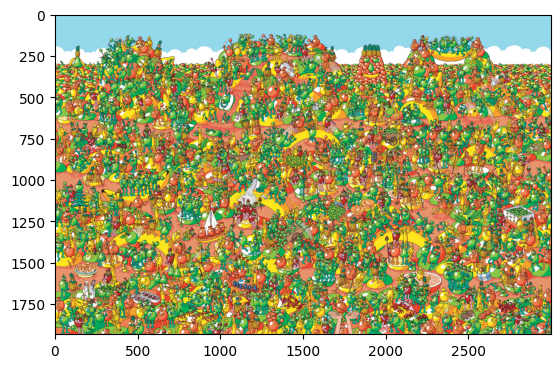

In [14]:
path = "/content/drive/MyDrive/EECS-4422/Lab04/waldo"
img_map = plt.imread(path + '/wheres_waldo1.jpeg')
img_map = np.float32(img_map)/255.
plt.imshow(img_map)
print(img_map.shape)

(28, 25, 3)


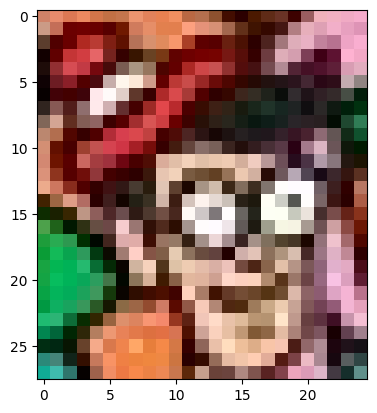

In [15]:
img_filter = plt.imread(path+'/waldo1.png')
img_filter = img_filter[:,:,:3]
plt.imshow(img_filter)
print(img_filter.shape)

In [16]:
H,W,C = img_map.shape
h,w,c = img_filter.shape

In [17]:
diff = np.zeros((H-h,W-w))

In [18]:
b = (img_filter - np.mean(img_filter)) / (np.std(img_filter))
for i in tqdm(range(H-h)):
    for j in range(W-w):
        a = img_map[i:i+h,j:j+w,:]
        c = (a - np.mean(a)) / (np.std(a) * len(a.ravel()))
        d = (c * b).sum()
        diff[i,j] = d if not np.isnan(d) else -1

 10%|█         | 200/1905 [01:04<08:43,  3.26it/s]<ipython-input-18-b5b2944b81c6>:5: RuntimeWarning: invalid value encountered in true_divide
  c = (a - np.mean(a)) / (np.std(a) * len(a.ravel()))
100%|██████████| 1905/1905 [09:42<00:00,  3.27it/s]


In [19]:
x0,y0 = np.unravel_index(diff.argmax(), diff.shape)

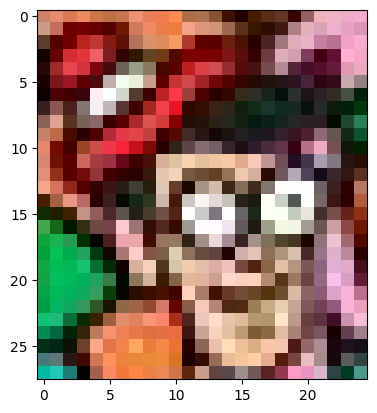

In [21]:
plt.imshow(img_map[x0:x0+h,y0:y0+w,:])